# V-CNN code support for paper:
R. Dogaru and Ioana Dogaru, "V-CNN: A versatile light CNN structure for image recognition on resources-constrained platforms"
Copyright Radu and Ioana Dogaru, contact: radu.dogaru@upb.ro

#CELL 0 - run only when emnist or svhn datasest are needed



In [1]:
!pip install kaggle

In [2]:
# copy kaggle.json to /root/.kaggle/ folder so that kaggle cli can access it.
!mkdir /.kaggle
!mv kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download ioanad70/cerv64

Dataset URL: https://www.kaggle.com/datasets/ioanad70/cerv64
License(s): unknown
 17% 5.00M/29.2M [00:00<00:01, 25.3MB/s]
100% 29.2M/29.2M [00:00<00:00, 109MB/s] 


In [4]:
!kaggle datasets download sakibapon/cervical-cancer-balanced-dataset

Dataset URL: https://www.kaggle.com/datasets/sakibapon/cervical-cancer-balanced-dataset
License(s): unknown
 85% 132M/155M [00:01<00:00, 137MB/s]
100% 155M/155M [00:01<00:00, 135MB/s]


In [5]:
!unzip cerv64.zip

Datele de ieșire de afișat au fost trunchiate la ultimele 5000 linii.
  inflating: cerv64_propriu/train/Superficial-Intermediate/053_04.jpg  
  inflating: cerv64_propriu/train/Superficial-Intermediate/053_06.jpg  
  inflating: cerv64_propriu/train/Superficial-Intermediate/054_01.jpg  
  inflating: cerv64_propriu/train/Superficial-Intermediate/054_02.jpg  
  inflating: cerv64_propriu/train/Superficial-Intermediate/054_03.jpg  
  inflating: cerv64_propriu/train/Superficial-Intermediate/054_04.jpg  
  inflating: cerv64_propriu/train/Superficial-Intermediate/054_05.jpg  
  inflating: cerv64_propriu/train/Superficial-Intermediate/055_01.jpg  
  inflating: cerv64_propriu/train/Superficial-Intermediate/055_02.jpg  
  inflating: cerv64_propriu/train/Superficial-Intermediate/055_04.jpg  
  inflating: cerv64_propriu/train/Superficial-Intermediate/055_05.jpg  
  inflating: cerv64_propriu/train/Superficial-Intermediate/055_06.jpg  
  inflating: cerv64_propriu/train/Superficial-Intermediate/056_01.

In [6]:
!unzip cervical-cancer-balanced-dataset.zip

Datele de ieșire de afișat au fost trunchiate la ultimele 5000 linii.
  inflating: Cervical Cancer Balanced Data/train/Type_3/type_3_1043.jpg  
  inflating: Cervical Cancer Balanced Data/train/Type_3/type_3_1044.jpg  
  inflating: Cervical Cancer Balanced Data/train/Type_3/type_3_1045.jpg  
  inflating: Cervical Cancer Balanced Data/train/Type_3/type_3_1046.jpg  
  inflating: Cervical Cancer Balanced Data/train/Type_3/type_3_1047.jpg  
  inflating: Cervical Cancer Balanced Data/train/Type_3/type_3_1048.jpg  
  inflating: Cervical Cancer Balanced Data/train/Type_3/type_3_1049.jpg  
  inflating: Cervical Cancer Balanced Data/train/Type_3/type_3_105.jpg  
  inflating: Cervical Cancer Balanced Data/train/Type_3/type_3_1050.jpg  
  inflating: Cervical Cancer Balanced Data/train/Type_3/type_3_1051.jpg  
  inflating: Cervical Cancer Balanced Data/train/Type_3/type_3_1052.jpg  
  inflating: Cervical Cancer Balanced Data/train/Type_3/type_3_1053.jpg  
  inflating: Cervical Cancer Balanced Data/

# CELL 1  -Loading datsets, scaling and defining input/output shapes  
may be replaced with other procedures to access data, e.g. using data generators

In [7]:
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
datagen=True # forma de acces la date
myset=2


if myset==1:
    dataset='cerv64' # pentru listarea intr-un raport

    train_dir='/content/cerv64_propriu/train'
    val_dir='/content/cerv64_propriu/val'
    test_dir='/content/cerv64_propriu/test'

    train_datagen = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2 , rescale = 1./255 , horizontal_flip=True)
    val_datagen = ImageDataGenerator(rescale = 1./255)
    test_datagen = ImageDataGenerator(rescale = 1./255)

    imsize = 96
    batch_size = 16 #de testat optimul
    train_batch = batch_size
    val_batch = batch_size
    test_batch = batch_size

    train_generator = train_datagen.flow_from_directory(train_dir, target_size=(imsize, imsize), batch_size = train_batch)
    validation_generator = val_datagen.flow_from_directory(val_dir, target_size=(imsize, imsize), batch_size = val_batch)
    test_generator = test_datagen.flow_from_directory(test_dir, target_size=(imsize, imsize), batch_size = batch_size, class_mode = 'categorical')

elif myset==2:
    dataset='cervical_cancer2' # pentru listarea intr-un raport

    train_dir='/content/Cervical Cancer Balanced Data/train'
    val_dir='/content/Cervical Cancer Balanced Data/val'
    test_dir='/content/Cervical Cancer Balanced Data/test'

    train_datagen = ImageDataGenerator(rescale = 1./255)
    val_datagen = ImageDataGenerator(rescale = 1./255)
    test_datagen = ImageDataGenerator(rescale = 1./255)

    imsize = 96
    batch_size = 16
    train_batch = batch_size
    val_batch = batch_size
    test_batch = batch_size

    train_generator = train_datagen.flow_from_directory(train_dir, target_size=(imsize, imsize), batch_size = train_batch)
    validation_generator = val_datagen.flow_from_directory(val_dir, target_size=(imsize, imsize), batch_size = val_batch)
    test_generator = test_datagen.flow_from_directory(test_dir, target_size=(imsize, imsize), batch_size = batch_size, class_mode = 'categorical')

classes = list(train_generator.class_indices.keys())
classes


input_shape = train_generator.image_shape
num_classes = len(classes)

print('numar clase: ', num_classes)
print('format intrare: ', input_shape)
print('etichetele claselor: ', classes)


Found 7659 images belonging to 3 classes.
Found 2411 images belonging to 3 classes.
Found 1804 images belonging to 3 classes.
numar clase:  3
format intrare:  (96, 96, 3)
etichetele claselor:  ['Type_1', 'Type_2', 'Type_3']


# EfficientNet - can be used alternatively for comparsions (after installing the library)


In [9]:
!pip install -U --pre efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.8 MB/s eta 0:00:00


In [33]:
import efficientnet.tfkeras as efn
def get_efficientNet_model():
    enet = efn.EfficientNetB0(
        input_shape=input_shape,
        weights='noisy-student',
        include_top=False
    )

    model = tf.keras.Sequential([
        enet,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model
model_name = 'Set2_EfficientNetB0_Keras'

In [34]:
#with strategy.scope():  # if TPU
    # Get the model
model = get_efficientNet_model()

    # Compile the Model
model.compile(
        optimizer='adam',
        loss = 'categorical_crossentropy',
        metrics=['accuracy'],
        #steps_per_execution=16
    )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 3, 3, 1280)        4049564   
 l)                                                              
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 4053407 (15.46 MB)
Trainable params: 4011391 (15.30 MB)
Non-trainable params: 42016 (164.12 KB)
_________________________________________________________________


# Augmenting data



In [35]:
augment=0   # 0 - non-augmented (fast training) 1,2,3 .. various schemes ..
# ----------------------
from tensorflow.keras.preprocessing.image import ImageDataGenerator
if augment==1:
  data_generator = ImageDataGenerator(
                        ### --- useful for FER2013 ---

                          featurewise_center=False,
                          featurewise_std_normalization=False,
                          rotation_range=10,
                          width_shift_range=0.1,
                          height_shift_range=0.1,
                          zoom_range=.1,
                          horizontal_flip=True
                          )

                        #------- useful for CIFAR10 according to https://github.com/moritzhambach/Image-Augmentation-in-Keras-CIFAR-10-
elif augment==2:
  data_generator = ImageDataGenerator(
                          rotation_range=15,
                          horizontal_flip=True,
                          width_shift_range=0.1,
                          height_shift_range=0.1
                        #------------------------------
                         )
elif augment==3:      # Proposed in https://github.com/khanhnamle1994/fashion-mnist/blob/master/CNN-4Conv.ipynb
  data_generator = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)




# Checkpoint for best validation accuracy

In [36]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import time as ti
checkpoint = ModelCheckpoint('best_model.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose=1)

# Training and validation

In [37]:
epoci=15

t1=ti.time()
if datagen:
  history = model.fit(train_generator, epochs=epoci, validation_data=validation_generator, verbose=1,
                    callbacks = checkpoint)
else:
  history = model.fit(x_train, y_train, epochs=epoci, validation_data=(x_test, y_test), batch_size=batch_size, verbose=1,
                    callbacks = checkpoint)

t2=ti.time()
print('====================================================')
print('Training with  ',epoci,' epochs, lasted  ',int(t2-t1)/60,' minutes')

model=load_model('best_model.h5')
print(model.name)
bp=model.get_weights()  # best weights set
t1=ti.time()
if datagen:
    score = model.evaluate(validation_generator, verbose=0)
else:
    score = model.evaluate(x_test, y_test, verbose=0)
t2=ti.time()

print('--------------  Raport rulare ------------------------')
print ('Marime model (parametri): ',model.count_params())
print('Cea mai buna acuratete pe set validare :', 100*score[1],'%')
print ('Timp predictie pe tot setul de test: ',t2-t1)
print('Set date: ',dataset)
print('Model: ',model_name)
print('Dimensiune imagine: ',imsize)
print('Batch size: ', batch_size)

Epoch 1/15
479/479 [==============================] - ETA: 0s - loss: 0.7473 - accuracy: 0.6480
Epoch 1: val_accuracy improved from -inf to 0.60514, saving model to best_model.h5
479/479 [==============================] - 65s 71ms/step - loss: 0.7473 - accuracy: 0.6480 - val_loss: 0.9129 - val_accuracy: 0.6051
Epoch 2/15
479/479 [==============================] - ETA: 0s - loss: 0.5817 - accuracy: 0.7316
Epoch 2: val_accuracy improved from 0.60514 to 0.65533, saving model to best_model.h5
479/479 [==============================] - 31s 65ms/step - loss: 0.5817 - accuracy: 0.7316 - val_loss: 0.7969 - val_accuracy: 0.6553
Epoch 3/15
479/479 [==============================] - ETA: 0s - loss: 0.4725 - accuracy: 0.7902
Epoch 3: val_accuracy did not improve from 0.65533
479/479 [==============================] - 31s 64ms/step - loss: 0.4725 - accuracy: 0.7902 - val_loss: 0.9318 - val_accuracy: 0.6483
Epoch 4/15
479/479 [==============================] - ETA: 0s - loss: 0.3713 - accuracy: 0.84

# Plots of training/validation process

<ipython-input-38-951775051a26>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


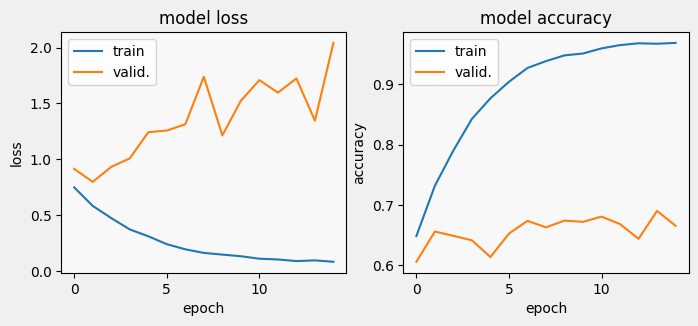

In [38]:
from matplotlib import pyplot as plt
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(7,3), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 121)
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 122)

In [40]:
# Loading the Lowest validation loss Model
model = load_model('best_model.h5')


# redefinire batch_size=intregul pachet de date (609 aici) deaorece altfel
# matricea de confuzie s-ar calcula numai pe un pachet "batch_size =16" si este irelevanta
test_generator.reset()
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(imsize, imsize), batch_size = 1804, class_mode = 'categorical')

#val_data.reset()
t1=ti.time()
accuracy = model.evaluate(test_generator, batch_size=609)[1]
t2=ti.time()
print(f"Acuratete set test = {accuracy*100} %")
print ('Martime model (parametri): ',model.count_params())
print('Latenta per intreg set test: ', 1000*(t2-t1), 'mili seconds')
print('Latenta per sample: ', 1000*(t2-t1)/(609), 'mili seconds')

#-- matrice de confuzie -------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix
# leucreaza pe un pachet de dimensiune batch_size
# eventual ar trebui redefint setul de test


for i,j in test_generator:
    print(i.shape, j.shape)
    p = model.predict(i)
    p = p.argmax(-1)
    t = j.argmax(-1)
    print(classification_report(t,p))
    print(confusion_matrix(t,p))
    break

Found 1804 images belonging to 3 classes.
1/1 [==============================] - 12s 12s/step - loss: 1.8588 - accuracy: 0.6092
Acuratete set test = 60.92017889022827 %
Martime model (parametri):  4053407
Latenta per intreg set test:  23409.242153167725 mili seconds
Latenta per sample:  38.43882126956933 mili seconds
(1804, 96, 96, 3) (1804, 3)
57/57 [==============================] - 6s 54ms/step
              precision    recall  f1-score   support

           0       0.56      0.75      0.65       199
           1       0.67      0.65      0.66       997
           2       0.53      0.49      0.51       608

    accuracy                           0.61      1804
   macro avg       0.59      0.63      0.60      1804
weighted avg       0.61      0.61      0.61      1804

[[150  35  14]
 [ 96 651 250]
 [ 20 290 298]]


In [41]:
# Saving model
#-----------------------------------------------------------
#model.save('Set1_EfficientNetB0_Keras__9621.keras')  # use your favourite name
model.save('Set2_EfficientNetB0_Keras__6897.keras')

Testare

In [42]:
 test_generator = test_datagen.flow_from_directory(test_dir, target_size=(imsize, imsize), batch_size = 1, class_mode = 'categorical')

Found 1804 images belonging to 3 classes.


1/1 [==============================] - 1s 1s/step
Eticheta reală: Type_3
Eticheta prezisă: Type_3


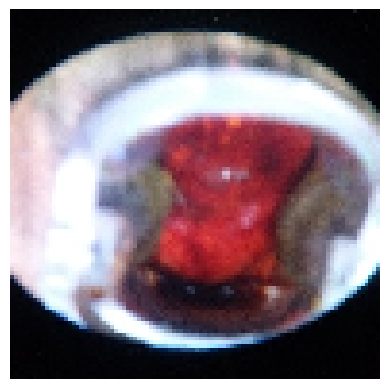

In [62]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Assuming you have functions to load your test data generator (`test_generator`) and class labels (`classes`)

# Load the saved model
model_path = "Set1_EfficientNetB0_Keras__9621.keras"
model = load_model(model_path)

# Select a random image from the test set (assuming `test_generator` provides images and labels)
random_index = random.randint(0, len(test_generator) - 1)
test_image, test_label = test_generator[random_index][0][0], test_generator[random_index][1][0]

# Expand dimension (likely for compatibility with the model's expected input shape)
test_image = np.expand_dims(test_image, axis=0)

# Predict the label for the selected image
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability

# Display the image (optional)
plt.imshow(test_image[0])
plt.axis('off')

# Get the real label based on the index in `test_label`
real_label = classes[np.argmax(test_label)]

# Print the real and predicted labels
print("Eticheta reală:", real_label)
print("Eticheta prezisă:", classes[predicted_class])

# Display the image (optional)
plt.show()